In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Suicides in India 2001-2012.csv")

In [3]:
pd.set_option('max_rows', 100)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [109]:
df_suicide = df.loc[(df['Total'] != 0) & (~df['State'].isin(["Total (All India)", "Total (States)", "Total (Uts)"]))]
df_no_suicide = df.loc[(df['Total'] == 0) & (~df['State'].isin(["Total (All India)", "Total (States)", "Total (Uts)"]))]

In [110]:
df_no_suicide.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [11]:
df_suicide.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


In [26]:
df_suicide.info()
print("\nShape : ",df_suicide.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101110 entries, 13 to 237518
Data columns (total 7 columns):
State        101110 non-null object
Year         101110 non-null int64
Type_code    101110 non-null object
Type         101110 non-null object
Gender       101110 non-null object
Age_group    101110 non-null object
Total        101110 non-null int64
dtypes: int64(2), object(5)
memory usage: 6.2+ MB

Shape :  (101110, 7)


In [112]:
df_no_suicide.info()
print("\nShape : ",df_no_suicide.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135473 entries, 0 to 237508
Data columns (total 7 columns):
State        135473 non-null object
Year         135473 non-null int64
Type_code    135473 non-null object
Type         135473 non-null object
Gender       135473 non-null object
Age_group    135473 non-null object
Total        135473 non-null int64
dtypes: int64(2), object(5)
memory usage: 8.3+ MB

Shape :  (135473, 7)


## EDA - DataFrame with Suicides

### State Distributiion

In [27]:
df_suicide_state = df_suicide.loc[~df_suicide['State'].isin(["A & N Islands", "Chandigarh", "D & N Haveli", "Daman & Diu", "Delhi (Ut)", "Lakshadweep", "Puducherry"])]

In [28]:
df_suicide_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91694 entries, 6713 to 237518
Data columns (total 7 columns):
State        91694 non-null object
Year         91694 non-null int64
Type_code    91694 non-null object
Type         91694 non-null object
Gender       91694 non-null object
Age_group    91694 non-null object
Total        91694 non-null int64
dtypes: int64(2), object(5)
memory usage: 5.6+ MB


Text(0.5,1,'Suicide Distribution by State')

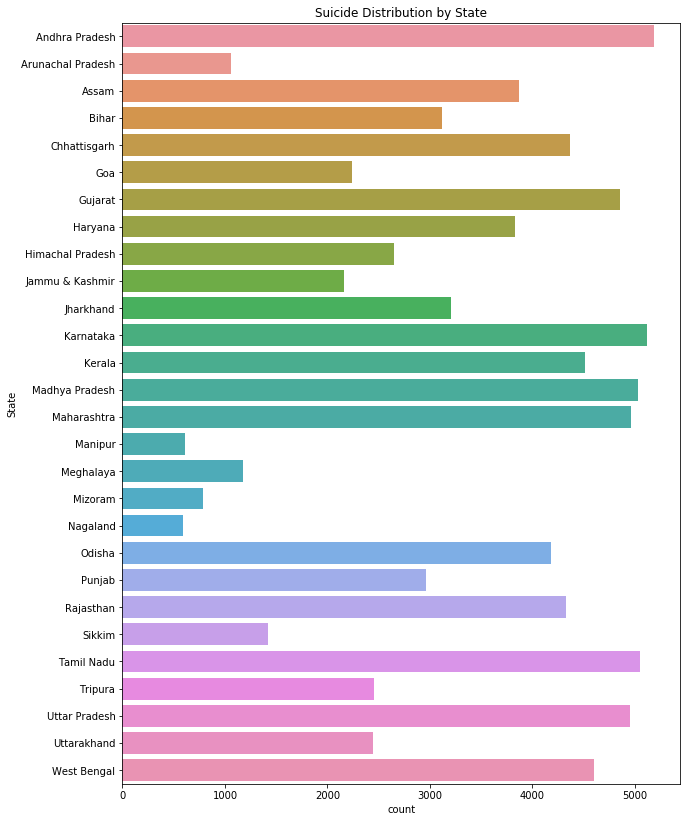

In [29]:
plt.subplots(figsize=(10,14))
sns.countplot(y= "State",data = df_suicide_state).set_title("Suicide Distribution by State")

Text(0.5,1,'Gender Suicide Distribution by State')

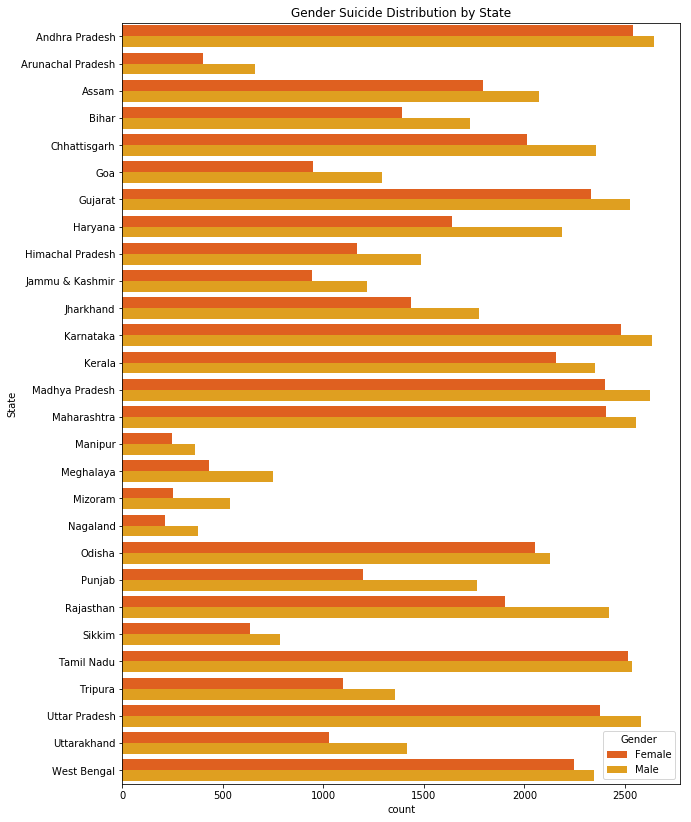

In [44]:
plt.subplots(figsize=(10,14))
sns.countplot(y= "State", hue= "Gender" ,data = df_suicide_state, palette= "autumn").set_title("Gender Suicide Distribution by State")

Text(0.5,1,'State Suicide Distribution by Age-Group')

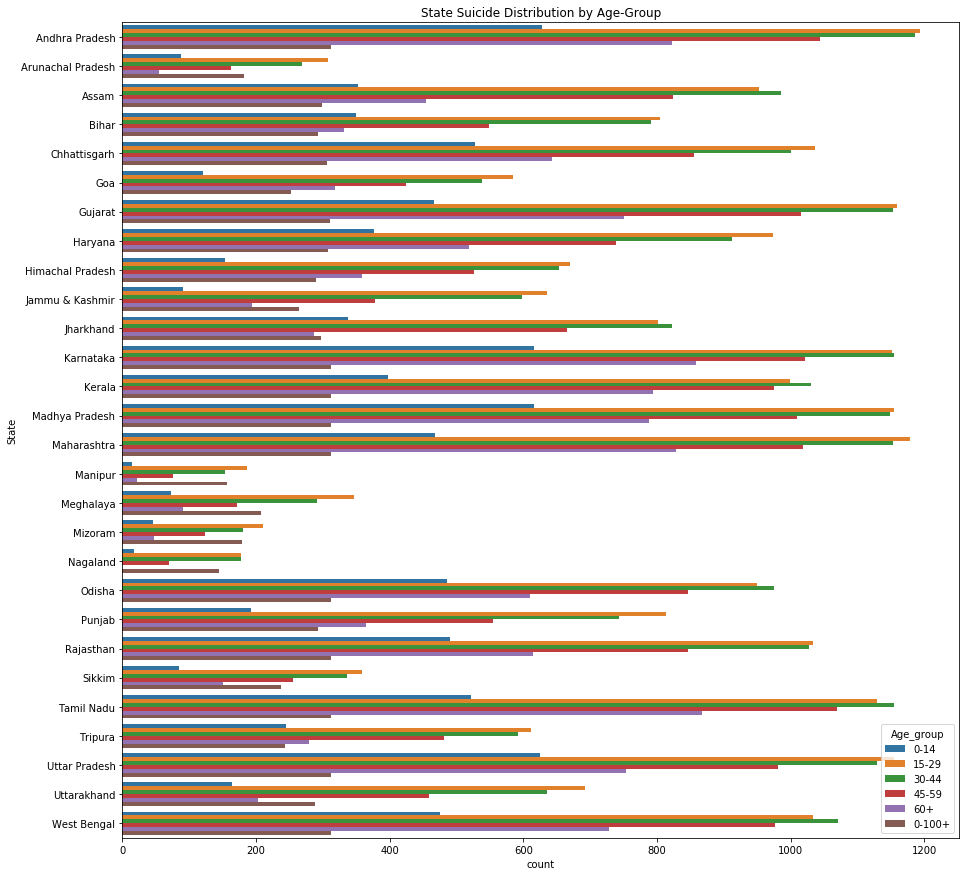

In [34]:
plt.subplots(figsize=(15,15))
sns.countplot(y= "State", hue= "Age_group" ,data = df_suicide_state).set_title("State Suicide Distribution by Age-Group")

Male      49454
Female    42240
Name: Gender, dtype: int64


Text(0.5,1,'Gender Suicide Distribution of State')

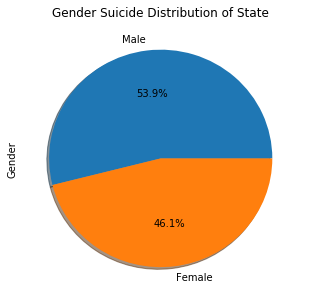

In [55]:
print(df_suicide_state.Gender.value_counts())
df_suicide_state.Gender.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title("Gender Suicide Distribution of State")

Text(0.5,1,'Gender Suicide Distribution of State by Age-Group')

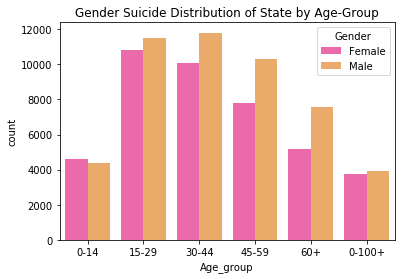

In [60]:
sns.countplot(x = "Age_group", hue= "Gender", data= df_suicide_state, palette= "spring").set_title("Gender Suicide Distribution of State by Age-Group")

Text(0.5,1,'Year Suicide Distribution of State')

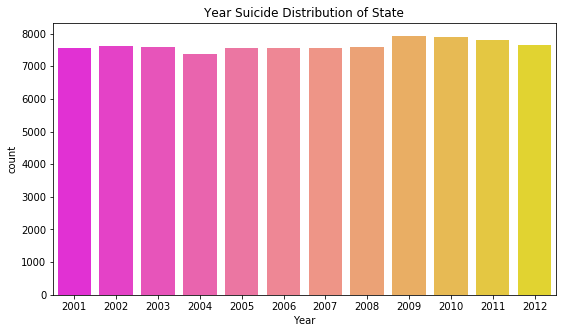

In [64]:
plt.subplots(figsize=(9,5))
sns.countplot(x = "Year", data= df_suicide_state, palette= "spring").set_title("Year Suicide Distribution of State")

Causes                  36104
Means_adopted           26921
Professional_Profile    21002
Education_Status         4728
Social_Status            2939
Name: Type_code, dtype: int64


Text(0.5,1,'Type-Code Distribution of State')

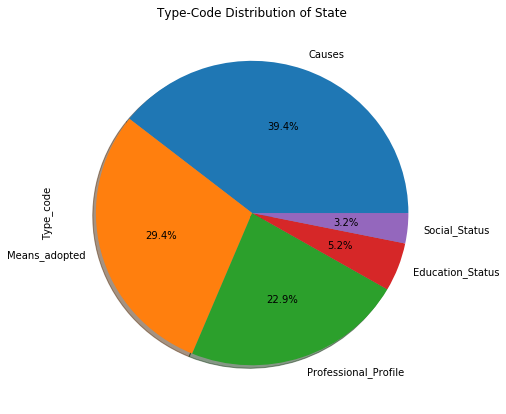

In [70]:
print(df_suicide_state.Type_code.value_counts())
df_suicide_state.Type_code.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(7,7))
plt.title("Type-Code Distribution of State")

Text(0.5,1,"Type:'Causes' for Suicide in State")

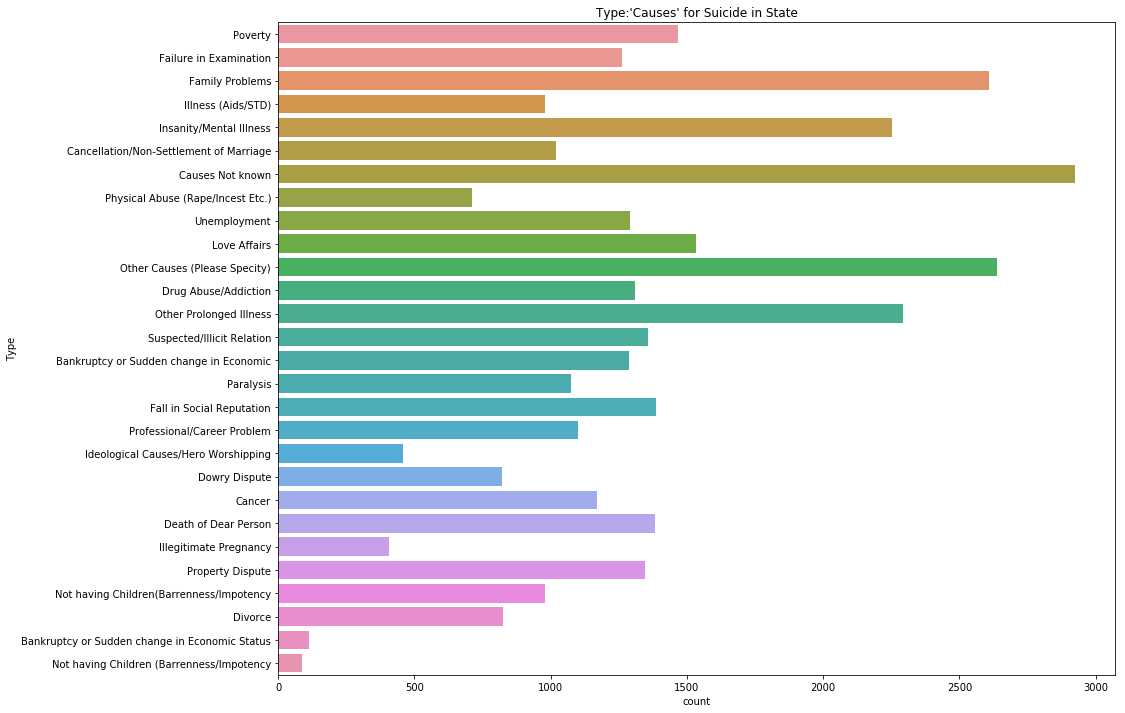

In [83]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Causes']
plt.subplots(figsize=(15,12))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type:'Causes' for Suicide in State")

Text(0.5,1,"Type:'Means_adopted' for Suicide in State")

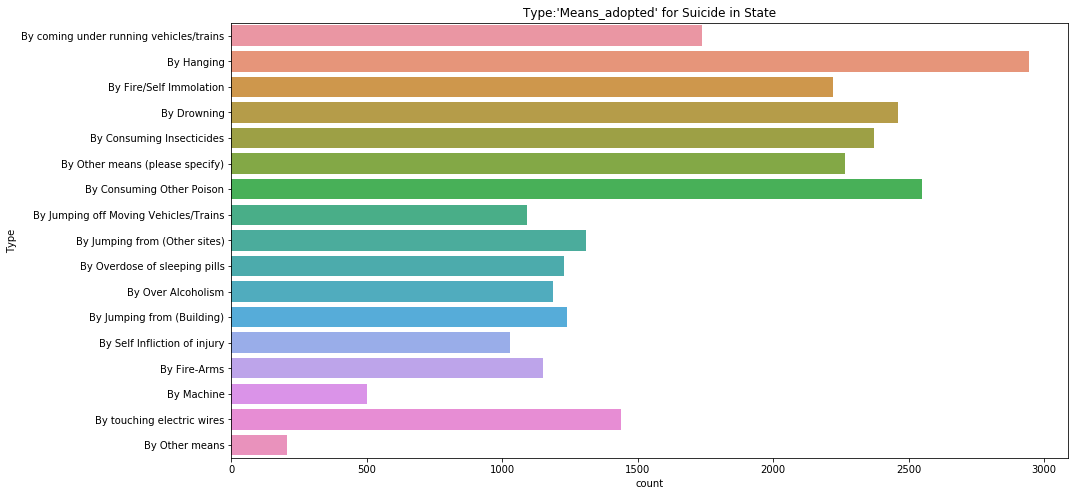

In [91]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Means_adopted']
plt.subplots(figsize=(15,8))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type:'Means_adopted' for Suicide in State")

Text(0.5,1,"Type: 'Social_Status' for Suicide in State")

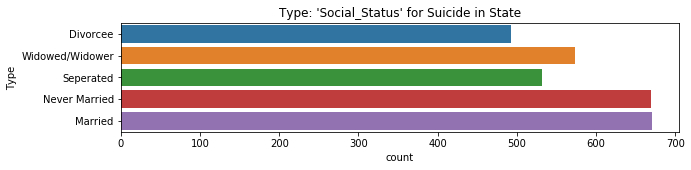

In [95]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Social_Status']
plt.subplots(figsize=(10,2))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type: 'Social_Status' for Suicide in State")

Text(0.5,1,"Type: 'Education_Status' for Suicide in State")

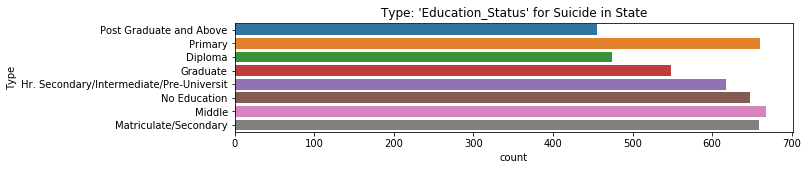

In [96]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Education_Status']
plt.subplots(figsize=(10,2))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type: 'Education_Status' for Suicide in State")

Text(0.5,1,"Type:'Professional_Profile' for Suicide in State")

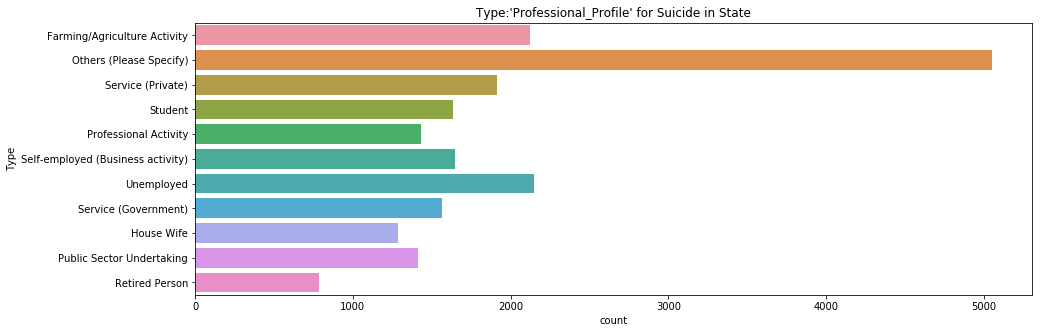

In [89]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Professional_Profile']
plt.subplots(figsize=(15,5))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type:'Professional_Profile' for Suicide in State")

### Union Terrirtory

In [35]:
df_suicide_ut = df_suicide.loc[df_suicide['State'].isin(["A & N Islands", "Chandigarh", "D & N Haveli", "Daman & Diu", "Delhi (Ut)", "Lakshadweep", "Puducherry"])]

In [36]:
df_suicide_ut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9416 entries, 13 to 182375
Data columns (total 7 columns):
State        9416 non-null object
Year         9416 non-null int64
Type_code    9416 non-null object
Type         9416 non-null object
Gender       9416 non-null object
Age_group    9416 non-null object
Total        9416 non-null int64
dtypes: int64(2), object(5)
memory usage: 588.5+ KB


Text(0.5,1,'Suicide Distribution by UT')

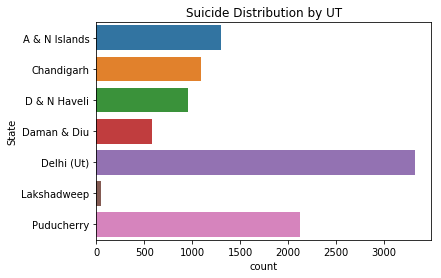

In [38]:
sns.countplot(y= "State",data = df_suicide_ut).set_title("Suicide Distribution by UT")

Text(0.5,1,'Gender Suicide Distribution by UT')

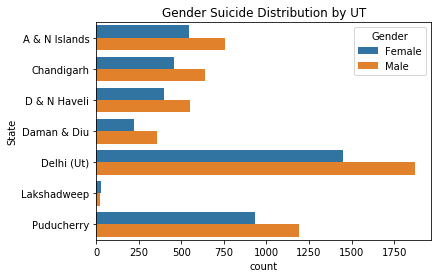

In [39]:
sns.countplot(y= "State", hue= "Gender" ,data = df_suicide_ut).set_title("Gender Suicide Distribution by UT")

Text(0.5,1,'UT Suicide Distribution by Age-Group')

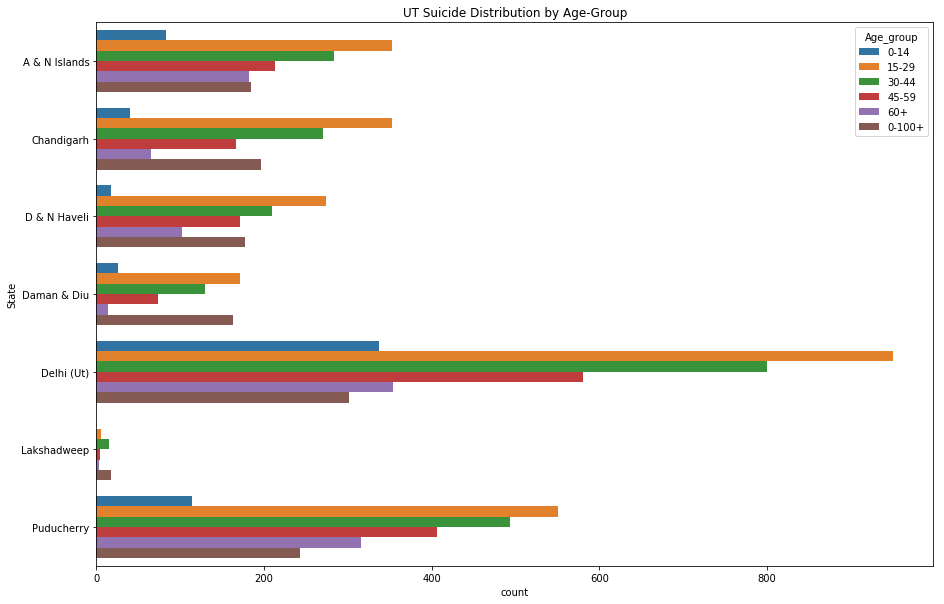

In [40]:
plt.subplots(figsize=(15,10))
sns.countplot(y= "State", hue= "Age_group" ,data = df_suicide_ut).set_title("UT Suicide Distribution by Age-Group")

Male      5387
Female    4029
Name: Gender, dtype: int64


Text(0.5,1,'Gender Suicide Distribution of UT')

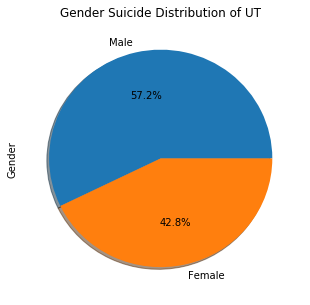

In [58]:
print(df_suicide_ut.Gender.value_counts())
df_suicide_ut.Gender.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title("Gender Suicide Distribution of UT")

Text(0.5,1,'Gender Suicide Distribution of UT by Age-Group')

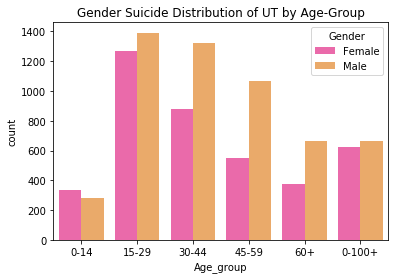

In [61]:
sns.countplot(x = "Age_group", hue= "Gender", data= df_suicide_ut, palette= "spring").set_title("Gender Suicide Distribution of UT by Age-Group")

Text(0.5,1,'Year Suicide Distribution of UT')

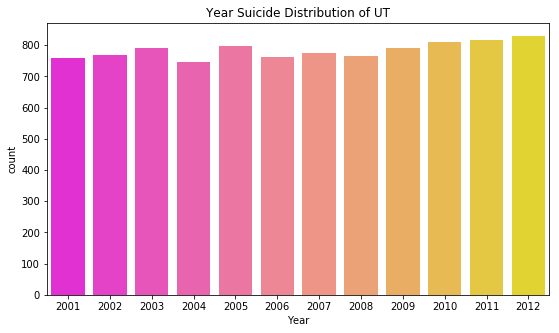

In [65]:
plt.subplots(figsize=(9,5))
sns.countplot(x = "Year", data= df_suicide_ut, palette= "spring").set_title("Year Suicide Distribution of UT")

Causes                  3427
Means_adopted           2416
Professional_Profile    2289
Education_Status         874
Social_Status            410
Name: Type_code, dtype: int64


Text(0.5,1,'Type-Code Distribution of UT')

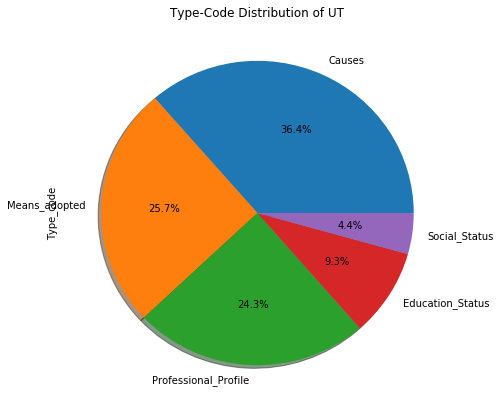

In [102]:
print(df_suicide_ut.Type_code.value_counts())
df_suicide_ut.Type_code.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(7,7))
plt.title("Type-Code Distribution of UT")

Text(0.5,1,"Type:'Causes' for Suicide in UT")

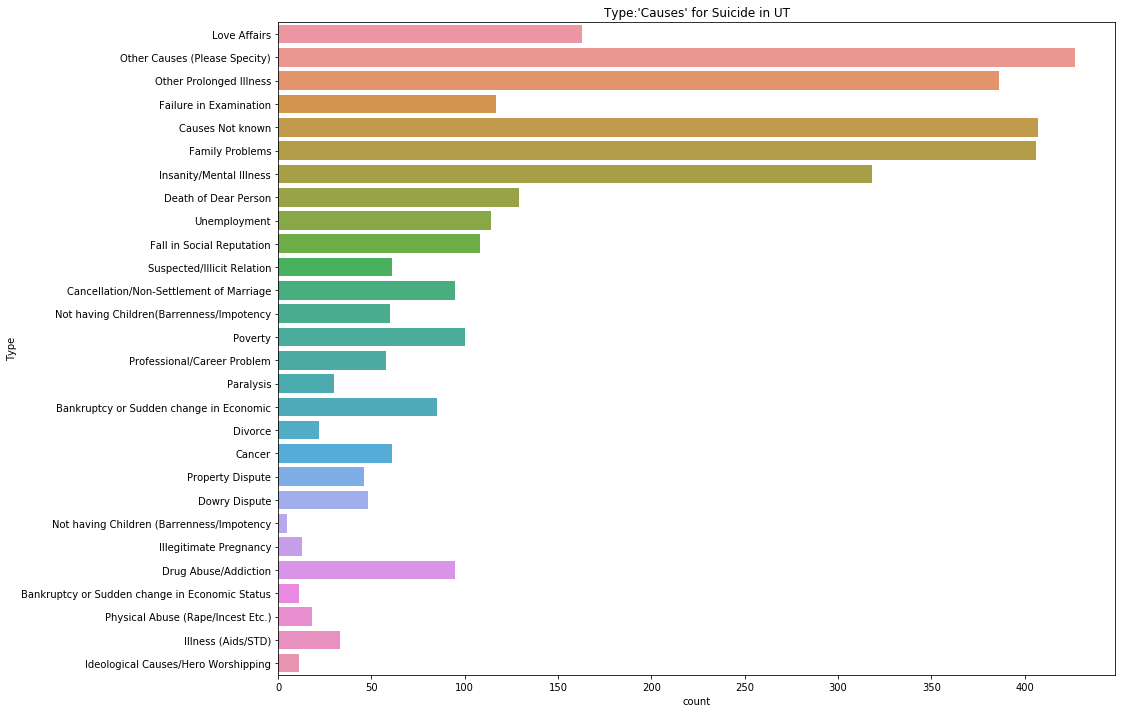

In [103]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Causes']
plt.subplots(figsize=(15,12))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type:'Causes' for Suicide in UT")

Text(0.5,1,"Type:'Means_adopted' for Suicide in UT")

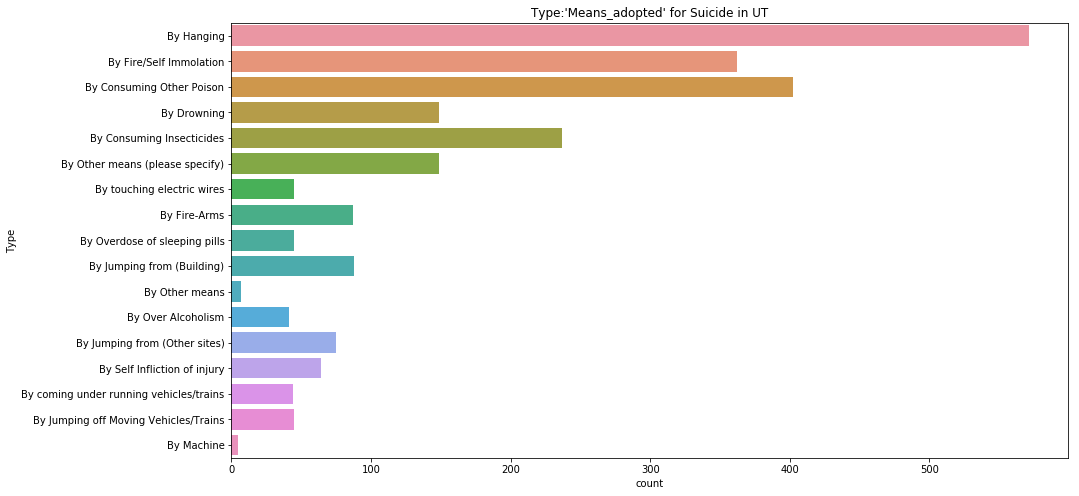

In [104]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Means_adopted']
plt.subplots(figsize=(15,8))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type:'Means_adopted' for Suicide in UT")

Text(0.5,1,"Type: 'Social_Status' for Suicide in UT")

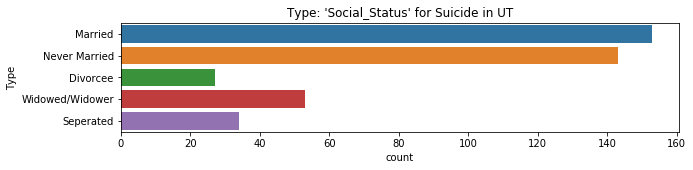

In [105]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Social_Status']
plt.subplots(figsize=(10,2))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type: 'Social_Status' for Suicide in UT")

Text(0.5,1,"Type: 'Education_Status' for Suicide in UT")

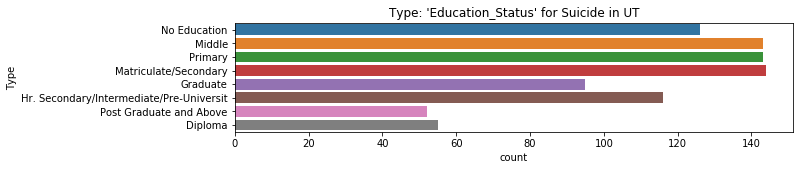

In [106]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Education_Status']
plt.subplots(figsize=(10,2))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type: 'Education_Status' for Suicide in UT")

Text(0.5,1,"Type:'Professional_Profile' for Suicide in UT")

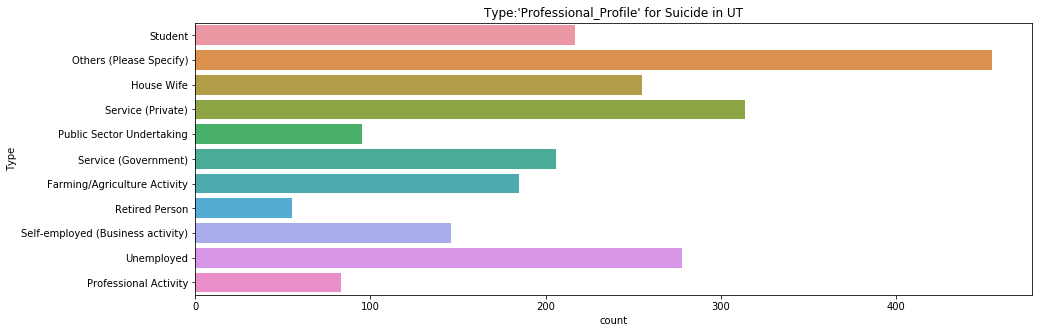

In [107]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Professional_Profile']
plt.subplots(figsize=(15,5))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type:'Professional_Profile' for Suicide in UT")

## EDA - DataFrame with No Suicides

### State

In [114]:
df_no_suicide_state = df_no_suicide.loc[~df_no_suicide['State'].isin(["A & N Islands", "Chandigarh", "D & N Haveli", "Daman & Diu", "Delhi (Ut)", "Lakshadweep", "Puducherry"])]

In [116]:
df_no_suicide_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97860 entries, 6712 to 237508
Data columns (total 7 columns):
State        97860 non-null object
Year         97860 non-null int64
Type_code    97860 non-null object
Type         97860 non-null object
Gender       97860 non-null object
Age_group    97860 non-null object
Total        97860 non-null int64
dtypes: int64(2), object(5)
memory usage: 6.0+ MB


Text(0.5,1,'No-Suicide Distribution by State')

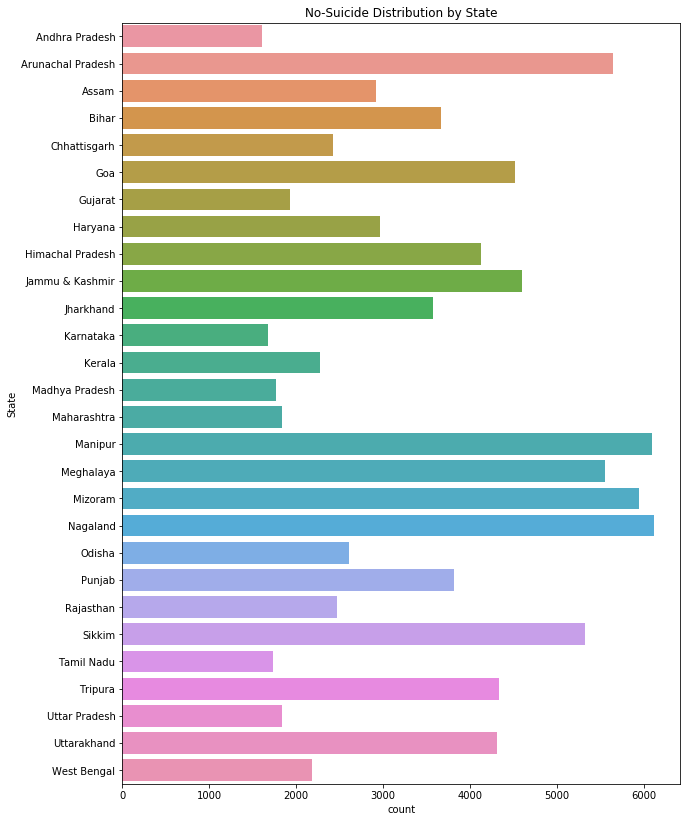

In [117]:
plt.subplots(figsize=(10,14))
sns.countplot(y= "State",data = df_no_suicide_state).set_title("No-Suicide Distribution by State")

Text(0.5,1,'Gender No-Suicide Distribution by State')

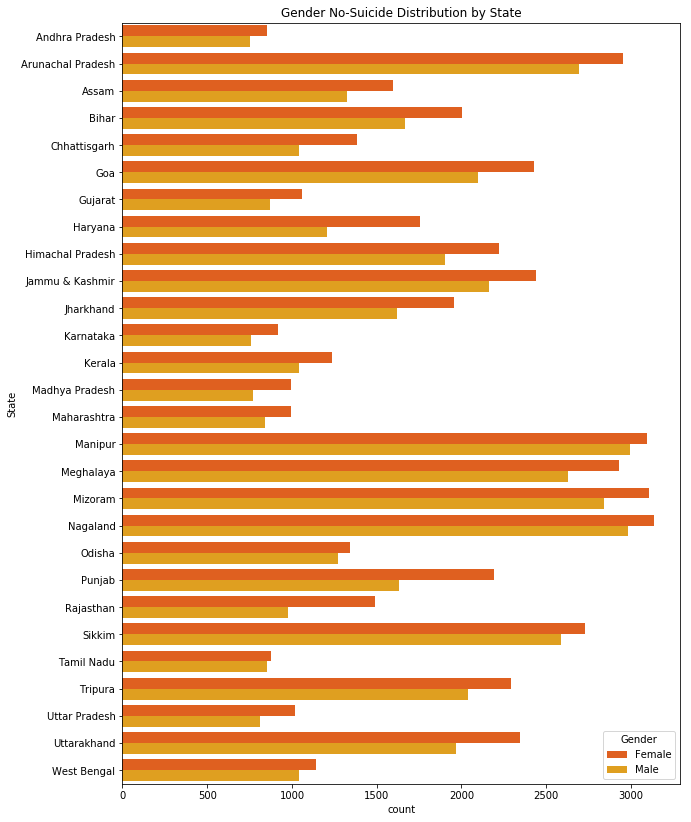

In [118]:
plt.subplots(figsize=(10,14))
sns.countplot(y= "State", hue= "Gender" ,data = df_no_suicide_state, palette= "autumn").set_title("Gender No-Suicide Distribution by State")

Text(0.5,1,'State No-Suicide Distribution by Age-Group')

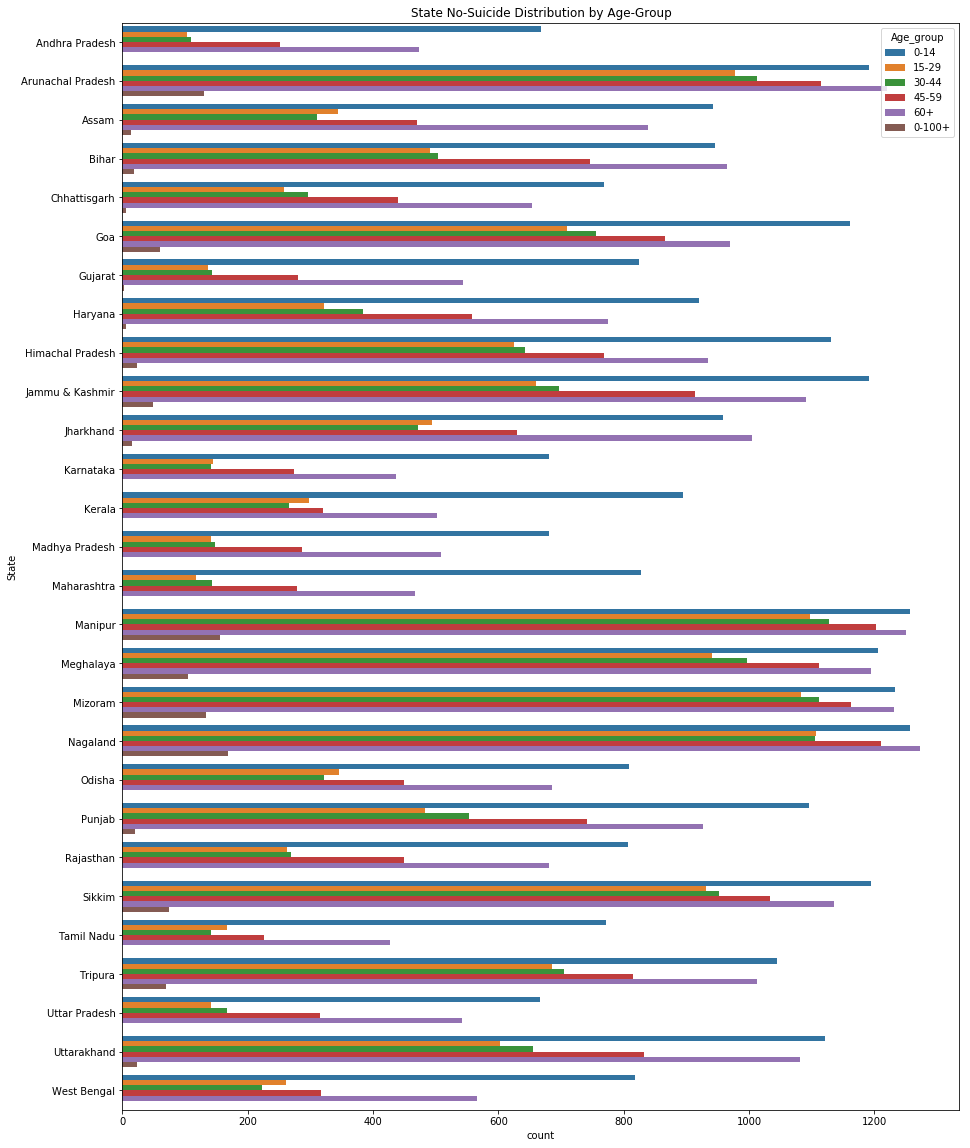

In [141]:
plt.subplots(figsize=(15,20))
sns.countplot(y= "State", hue= "Age_group" ,data = df_no_suicide_state).set_title("State No-Suicide Distribution by Age-Group")

Female    52473
Male      45387
Name: Gender, dtype: int64


Text(0.5,1,'Gender No-Suicide Distribution of State')

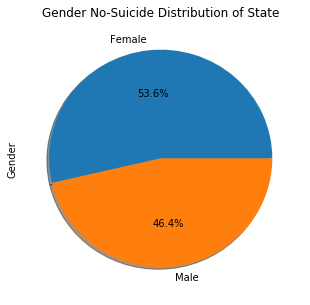

In [120]:
print(df_no_suicide_state.Gender.value_counts())
df_no_suicide_state.Gender.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title("Gender No-Suicide Distribution of State")

Text(0.5,1,'Gender No-Suicide Distribution of State by Age-Group')

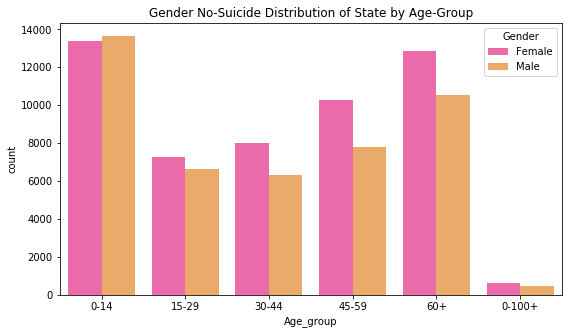

In [126]:
plt.subplots(figsize=(9,5))
sns.countplot(x = "Age_group", hue= "Gender", data= df_no_suicide_state, palette= "spring").set_title("Gender No-Suicide Distribution of State by Age-Group")

Text(0.5,1,'Year No-Suicide Distribution of State')

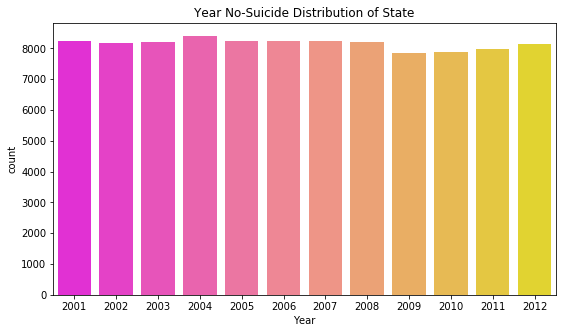

In [122]:
plt.subplots(figsize=(9,5))
sns.countplot(x = "Year", data= df_no_suicide_state, palette= "spring").set_title("Year No-Suicide Distribution of State")

### Union Territory

In [131]:
df_no_suicide_ut = df_no_suicide.loc[df_no_suicide['State'].isin(["A & N Islands", "Chandigarh", "D & N Haveli", "Daman & Diu", "Delhi (Ut)", "Lakshadweep", "Puducherry"])]

In [132]:
df_no_suicide_ut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37613 entries, 0 to 182377
Data columns (total 7 columns):
State        37613 non-null object
Year         37613 non-null int64
Type_code    37613 non-null object
Type         37613 non-null object
Gender       37613 non-null object
Age_group    37613 non-null object
Total        37613 non-null int64
dtypes: int64(2), object(5)
memory usage: 2.3+ MB


Text(0.5,1,'No-Suicide Distribution by UT')

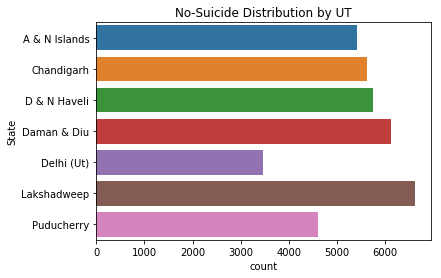

In [133]:
sns.countplot(y= "State",data = df_no_suicide_ut).set_title("No-Suicide Distribution by UT")

Text(0.5,1,'Gender No-Suicide Distribution by UT')

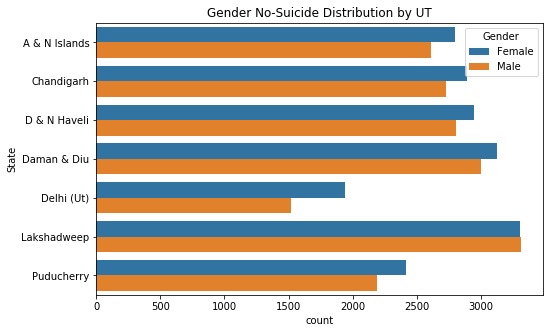

In [139]:
plt.subplots(figsize=(8,5))
sns.countplot(y= "State", hue= "Gender" ,data = df_no_suicide_ut).set_title("Gender No-Suicide Distribution by UT")

Text(0.5,1,'UT No-Suicide Distribution by Age-Group')

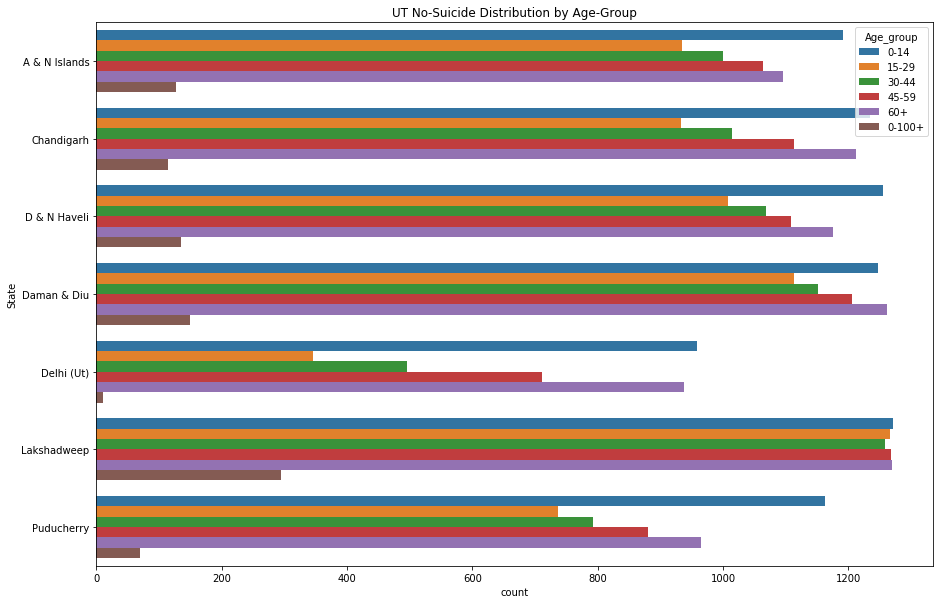

In [140]:
plt.subplots(figsize=(15,10))
sns.countplot(y= "State", hue= "Age_group" ,data = df_no_suicide_ut).set_title("UT No-Suicide Distribution by Age-Group")

Female    19430
Male      18183
Name: Gender, dtype: int64


Text(0.5,1,'Gender No-Suicide Distribution of UT')

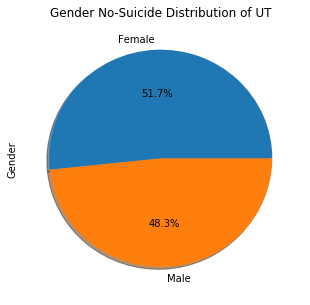

In [142]:
print(df_no_suicide_ut.Gender.value_counts())
df_no_suicide_ut.Gender.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title("Gender No-Suicide Distribution of UT")

Text(0.5,1,'Gender No-Suicide Distribution of UT by Age-Group')

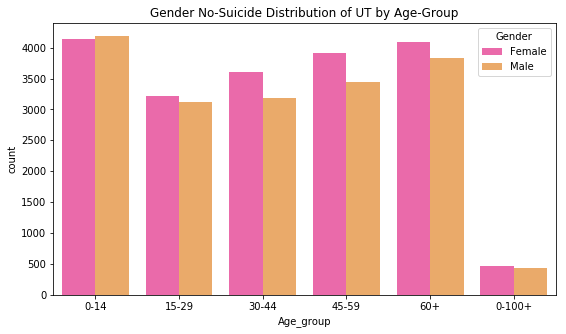

In [146]:
plt.subplots(figsize=(9,5))
sns.countplot(x = "Age_group", hue= "Gender", data= df_no_suicide_ut, palette= "spring").set_title("Gender No-Suicide Distribution of UT by Age-Group")

Text(0.5,1,'Year No-Suicide Distribution of UT')

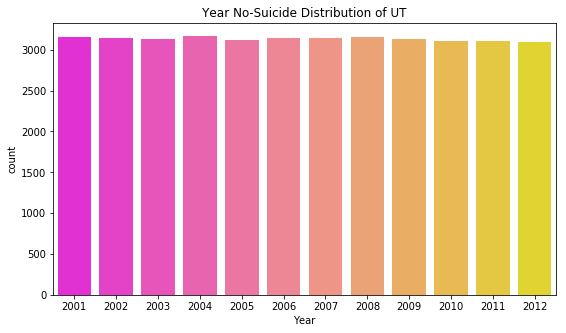

In [147]:
plt.subplots(figsize=(9,5))
sns.countplot(x = "Year", data= df_no_suicide_ut, palette= "spring").set_title("Year No-Suicide Distribution of UT")